# Gradient Descent

## **Description**
Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning(DL) to minimise a cost/loss function (e.g. in a linear regression).

![GradientDescent](descent2.png)

## Packages used
- matplotlib.pyplot
- numpy
- pandas

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 1.0, '$\\min_w$ $f(w)$ Example')

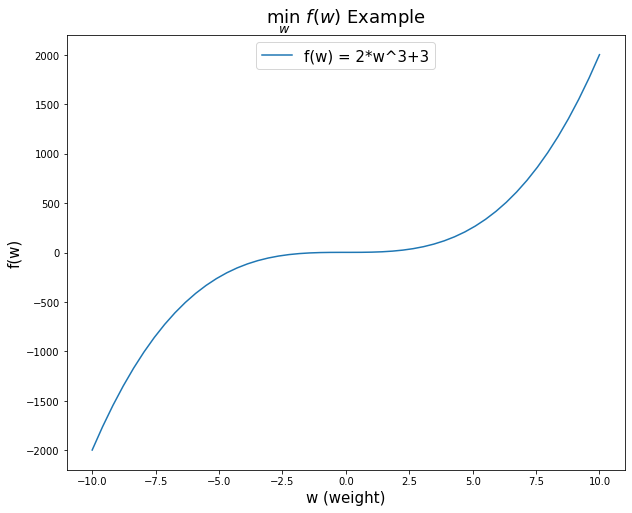

In [65]:
# Define test function for experimenting
def f(w):
    return 2*w**3+3

# Define domain variables for plotting f
domain = np.linspace(-10, 10, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = 2*w^3+3")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)

## First Guess

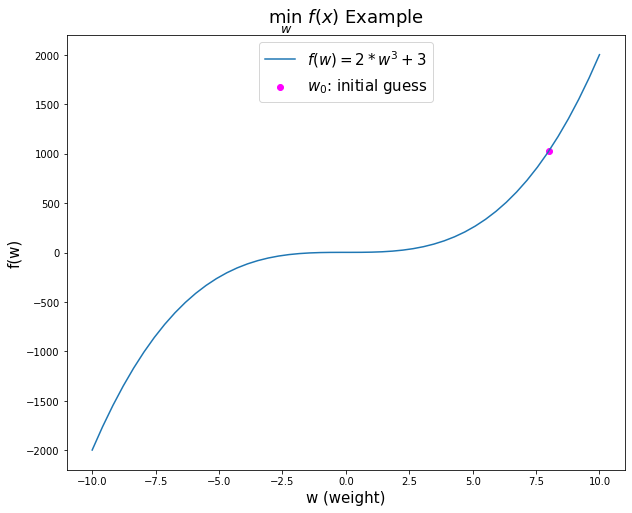

In [66]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = 2*w^3+3$")
plt.scatter([8], [f(8)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

# Polish how the gradient descent will look

C:\Users\Cesar Arias\AppData\Local\Temp\ipykernel_27656\3334134044.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.
  plt.plot(wrange,


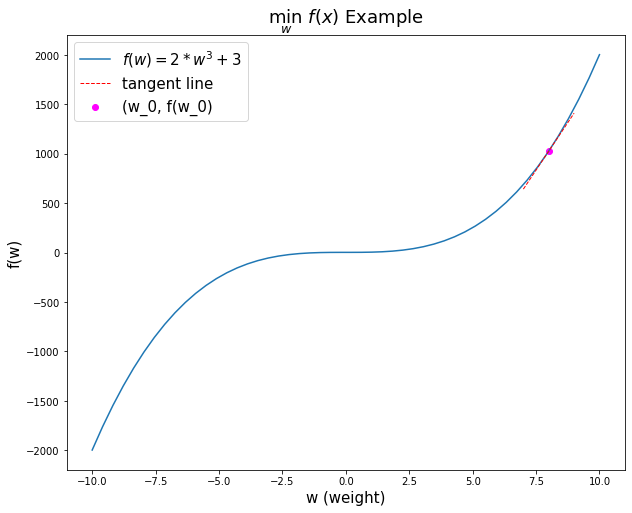

In [67]:
# Define parabola derivative
def df(w): 
    return 6*w**2

# Choose w_0
w_0 = 8

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i})")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = 2*w^3+3$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

# Creates the direction of descent and goes through iterations finding min value

C:\Users\Cesar Arias\AppData\Local\Temp\ipykernel_27656\3334134044.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.
  plt.plot(wrange,


w_0 = 8.0 | df(w_0) = 384.0
w_1 = 4.93 | df(w_1) = 145.711104
w_2 = 3.76 | df(w_2) = 84.92991194914515
w_3 = 3.08 | df(w_3) = 57.0245938900635
w_4 = 2.63 | df(w_4) = 41.39653315670738
w_5 = 2.3 | df(w_5) = 31.61600017232493
w_6 = 2.04 | df(w_6) = 25.032672221190644
w_7 = 1.84 | df(w_7) = 20.364713682662583
w_8 = 1.68 | df(w_8) = 16.922220861834703
w_9 = 1.54 | df(w_9) = 14.30394951573745
w_10 = 1.43 | df(w_10) = 12.262303725917723
w_11 = 1.33 | df(w_11) = 10.637161358951815
w_12 = 1.25 | df(w_12) = 9.320938418839596
w_13 = 1.17 | df(w_13) = 8.239017340109395
w_14 = 1.11 | df(w_14) = 7.338235339204752
w_15 = 1.05 | df(w_15) = 6.5798318191784
w_16 = 0.99 | df(w_16) = 5.934975142129069
w_17 = 0.95 | df(w_17) = 5.3818392953551
w_18 = 0.9 | df(w_18) = 4.9036429781726625
w_19 = 0.86 | df(w_19) = 4.487303723430627
w_20 = 0.83 | df(w_20) = 4.122495138160632
w_21 = 0.8 | df(w_21) = 3.80097438224253
w_22 = 0.77 | df(w_22) = 3.516094495496836
w_23 = 0.74 | df(w_23) = 3.262445482834245
w_24 = 0.71

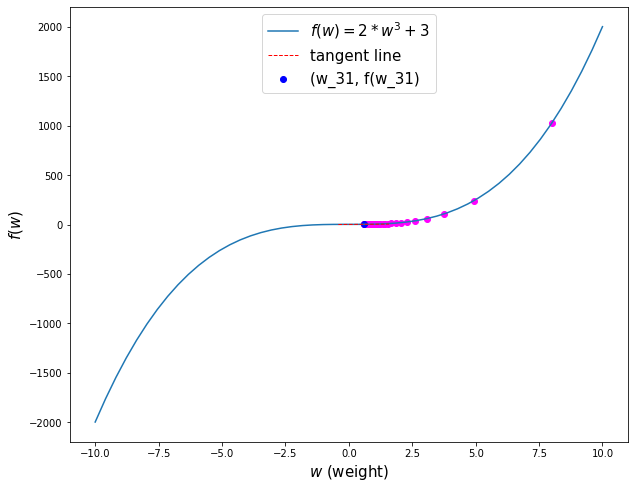

In [68]:
def derivative_descent(derivative, alpha = 0.008, w_0 = 8, max_iter =30):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = 2*w^3+3$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.show()
